<a href="https://colab.research.google.com/github/Charly156/Actividad_6_regresion_lineal_multiple_y_no_lineal/blob/main/Actividad_6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalar librería para análisis de variables categóricas
%pip install funpymodeling

In [ ]:
#Importar librerías
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
warnings.filterwarnings("ignore")

In [ ]:
%pip uninstall numpy

Found existing installation: numpy 1.26.0
Uninstalling numpy-1.26.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/lib/python3.10/dist-packages/numpy-1.26.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.26.0


In [ ]:
%pip install numpy

  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
#Leer archivo
df=pd.read_csv('BD_Socio formador (TrainingDataComplete).csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
#Selección de variables categóricas para aplicar un top 5
#automatizadas
automatizadas=df[['Married/Single', 'House_Ownership', 'Profession', 'CITY','Risk_Flag' ]]
automatizadas.head()

,Married/Single,House_Ownership,Profession,CITY,Risk_Flag
0,single,rented,Mechanical_engineer,Rewa,0
1,single,rented,Software_Developer,Parbhani,0
2,married,rented,Technical_writer,Alappuzha,0
3,single,rented,Software_Developer,Bhubaneswar,1
4,single,rented,Civil_servant,Tiruchirappalli[10],1


Tabla de frecuencias para Married/Single (las 5 categorías más frecuentes):

  Married/Single  Frecuencia
0         single      226272
1        married       25728

--------------------------------------------------



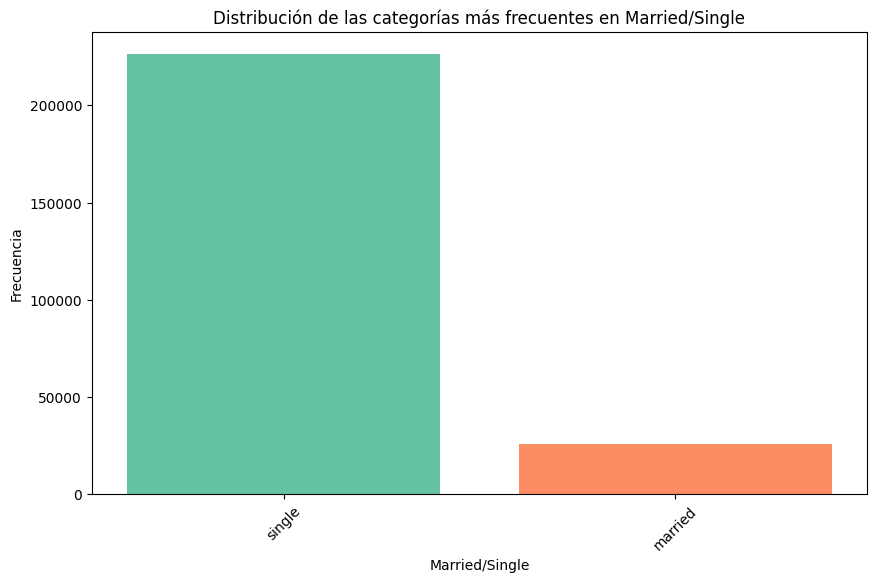

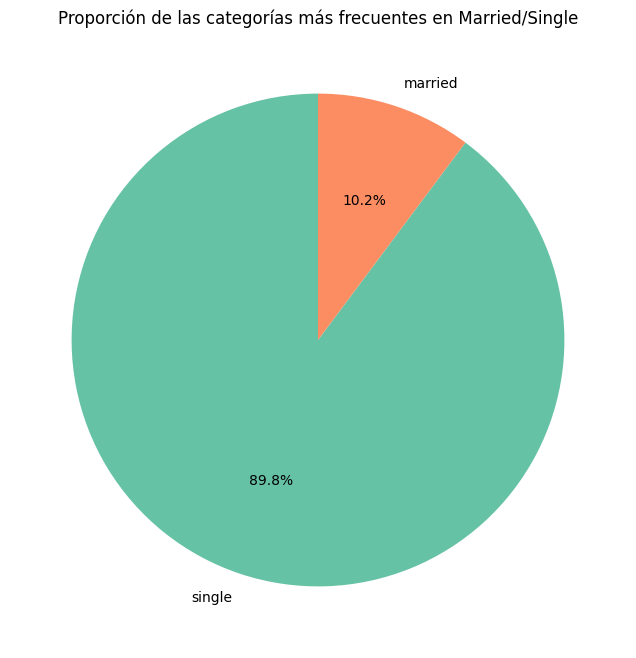

Tabla de frecuencias para House_Ownership (las 5 categorías más frecuentes):

  House_Ownership  Frecuencia
0          rented      231898
1           owned       12918
2    norent_noown        7184

--------------------------------------------------



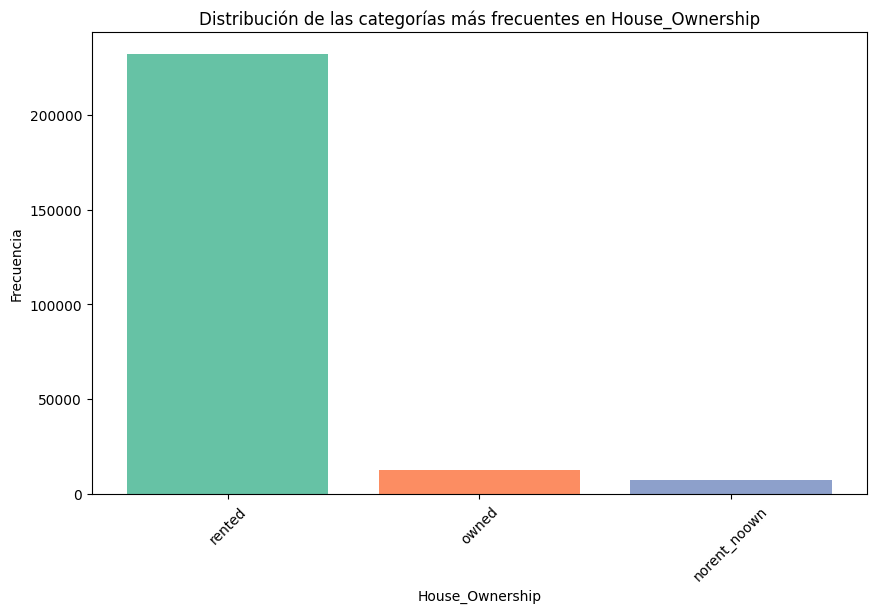

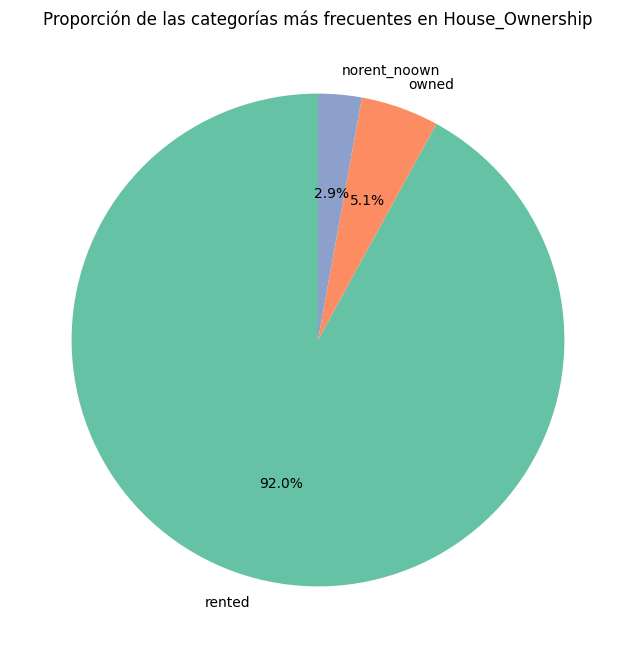

Tabla de frecuencias para Profession (las 5 categorías más frecuentes):

                   Profession  Frecuencia
0                   Physician        5957
1                Statistician        5806
2                Web_designer        5397
3                Psychologist        5390
4  Computer_hardware_engineer        5372

--------------------------------------------------



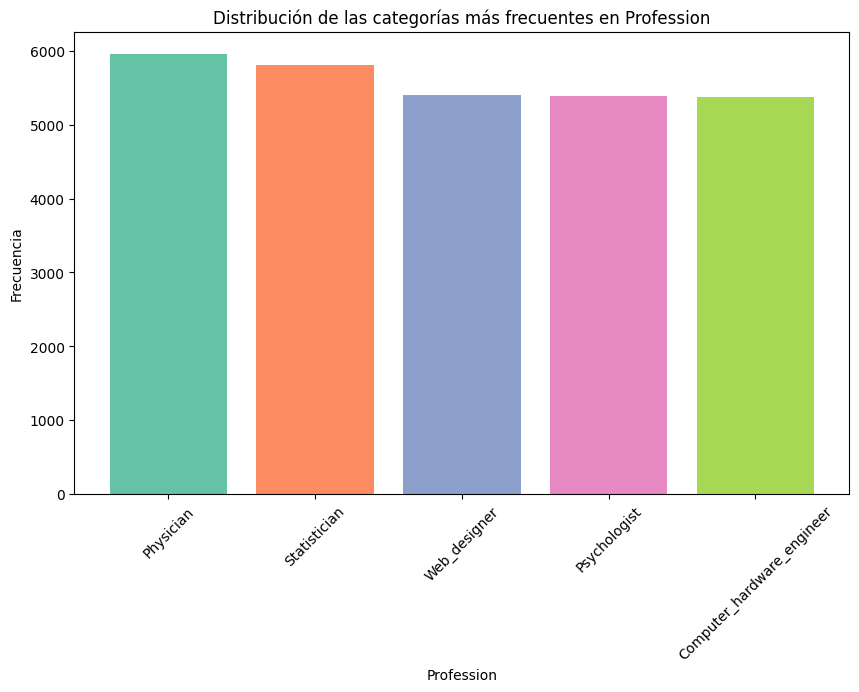

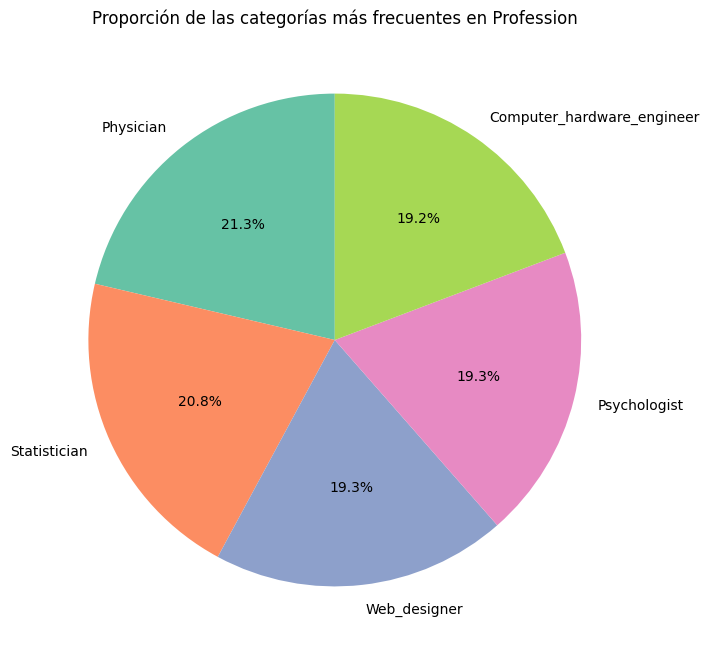

Tabla de frecuencias para CITY (las 5 categorías más frecuentes):

            CITY  Frecuencia
0  Vijayanagaram        1259
1         Bhopal        1208
2    Bulandshahr        1185
3    Saharsa[29]        1180
4     Vijayawada        1172

--------------------------------------------------



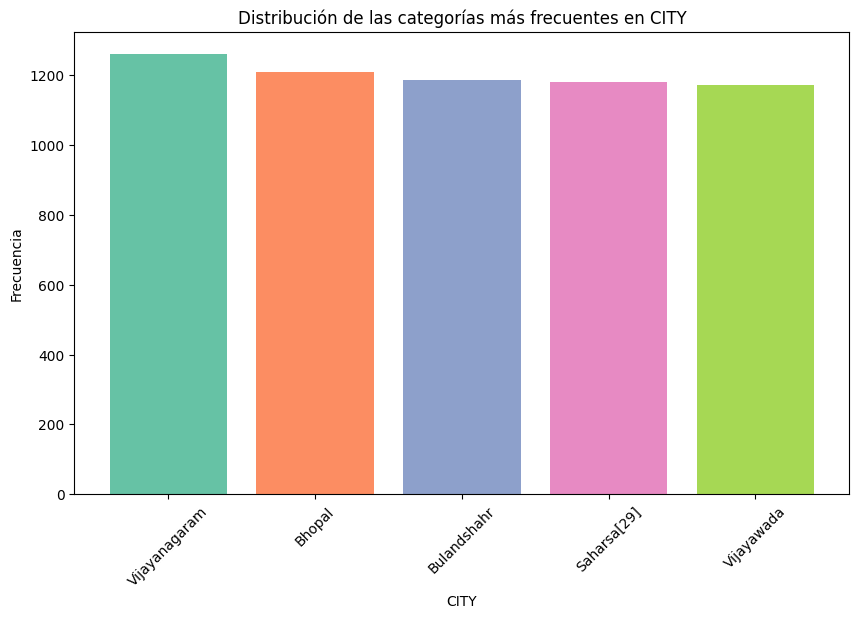

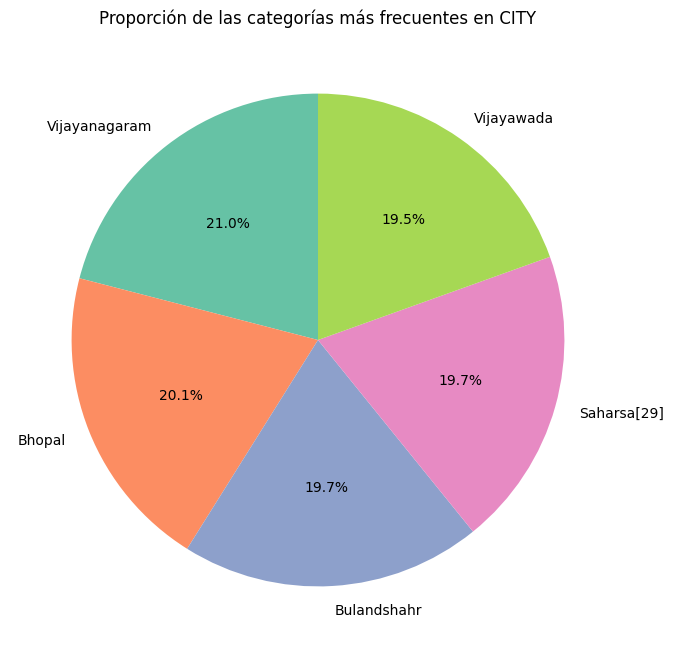

Tabla de frecuencias para Risk_Flag (las 5 categorías más frecuentes):

   Risk_Flag  Frecuencia
0          0      221004
1          1       30996

--------------------------------------------------



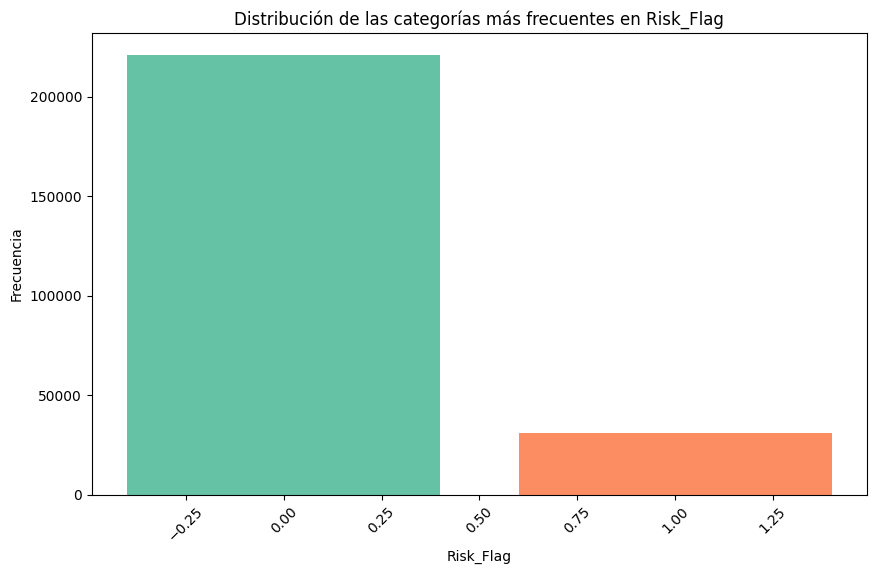

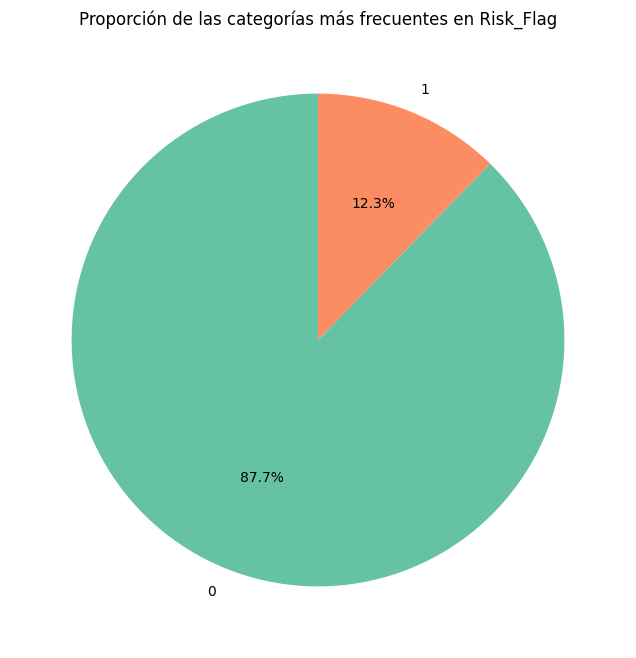

In [ ]:
# Número de categorías más frecuentes que deseas mostrar en los gráficos
top_categories_count = 5

# Realizar análisis descriptivo para cada variable categórica
for variable in automatizadas:
    # Obtener las categorías más frecuentes
    top_categories = automatizadas[variable].value_counts().head(top_categories_count)

    # Tabla de frecuencias para las categorías más frecuentes
    tabla_frecuencias = pd.DataFrame(top_categories).reset_index()
    tabla_frecuencias.columns = [variable, 'Frecuencia']

    # Imprimir la tabla de frecuencias
    print(f'Tabla de frecuencias para {variable} (las {top_categories_count} categorías más frecuentes):\n')
    print(tabla_frecuencias)
    print('\n' + '-'*50 + '\n')  # Separador

    # Gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(tabla_frecuencias[variable], tabla_frecuencias['Frecuencia'],color=sns.color_palette('Set2'))
    plt.title(f'Distribución de las categorías más frecuentes en {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de pastel para las categorías más frecuentes
    plt.figure(figsize=(8, 8))
    plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Proporción de las categorías más frecuentes en {variable}')
    plt.show()

In [ ]:
#Se analizarán individualmente
no_automatizadas=['Age', 'Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

##Columna 1

In [ ]:
#Obtengo un análisis univariado de una variable categórica en especifico
#df[no_automatizadas[0]] = Age
table1 = freq_tbl(df[no_automatizadas[0]].astype(str))
table1

,Age,frequency,percentage,cumulative_perc
0,27,5197,0.020623,0.020623
1,66,5092,0.020206,0.040829
2,48,4967,0.019710,0.060540
3,33,4921,0.019528,0.080067
4,41,4827,0.019155,0.099222
5,45,4806,0.019071,0.118294
6,54,4785,0.018988,0.137282
7,68,4772,0.018937,0.156218
8,35,4643,0.018425,0.174643
9,50,4624,0.018349,0.192992


In [ ]:
#Ajusto el indice de mi dataframe
#cambiamos el indice que viene establecido, al que nosotros querramos
table1_index = table1.set_index('Age')
table1_index

,frequency,percentage,cumulative_perc
Age,,,
27,5197,0.020623,0.020623
66,5092,0.020206,0.040829
48,4967,0.019710,0.060540
33,4921,0.019528,0.080067
41,4827,0.019155,0.099222
45,4806,0.019071,0.118294
54,4785,0.018988,0.137282
68,4772,0.018937,0.156218
35,4643,0.018425,0.174643


Text(0, 0.5, 'Frecuencia')

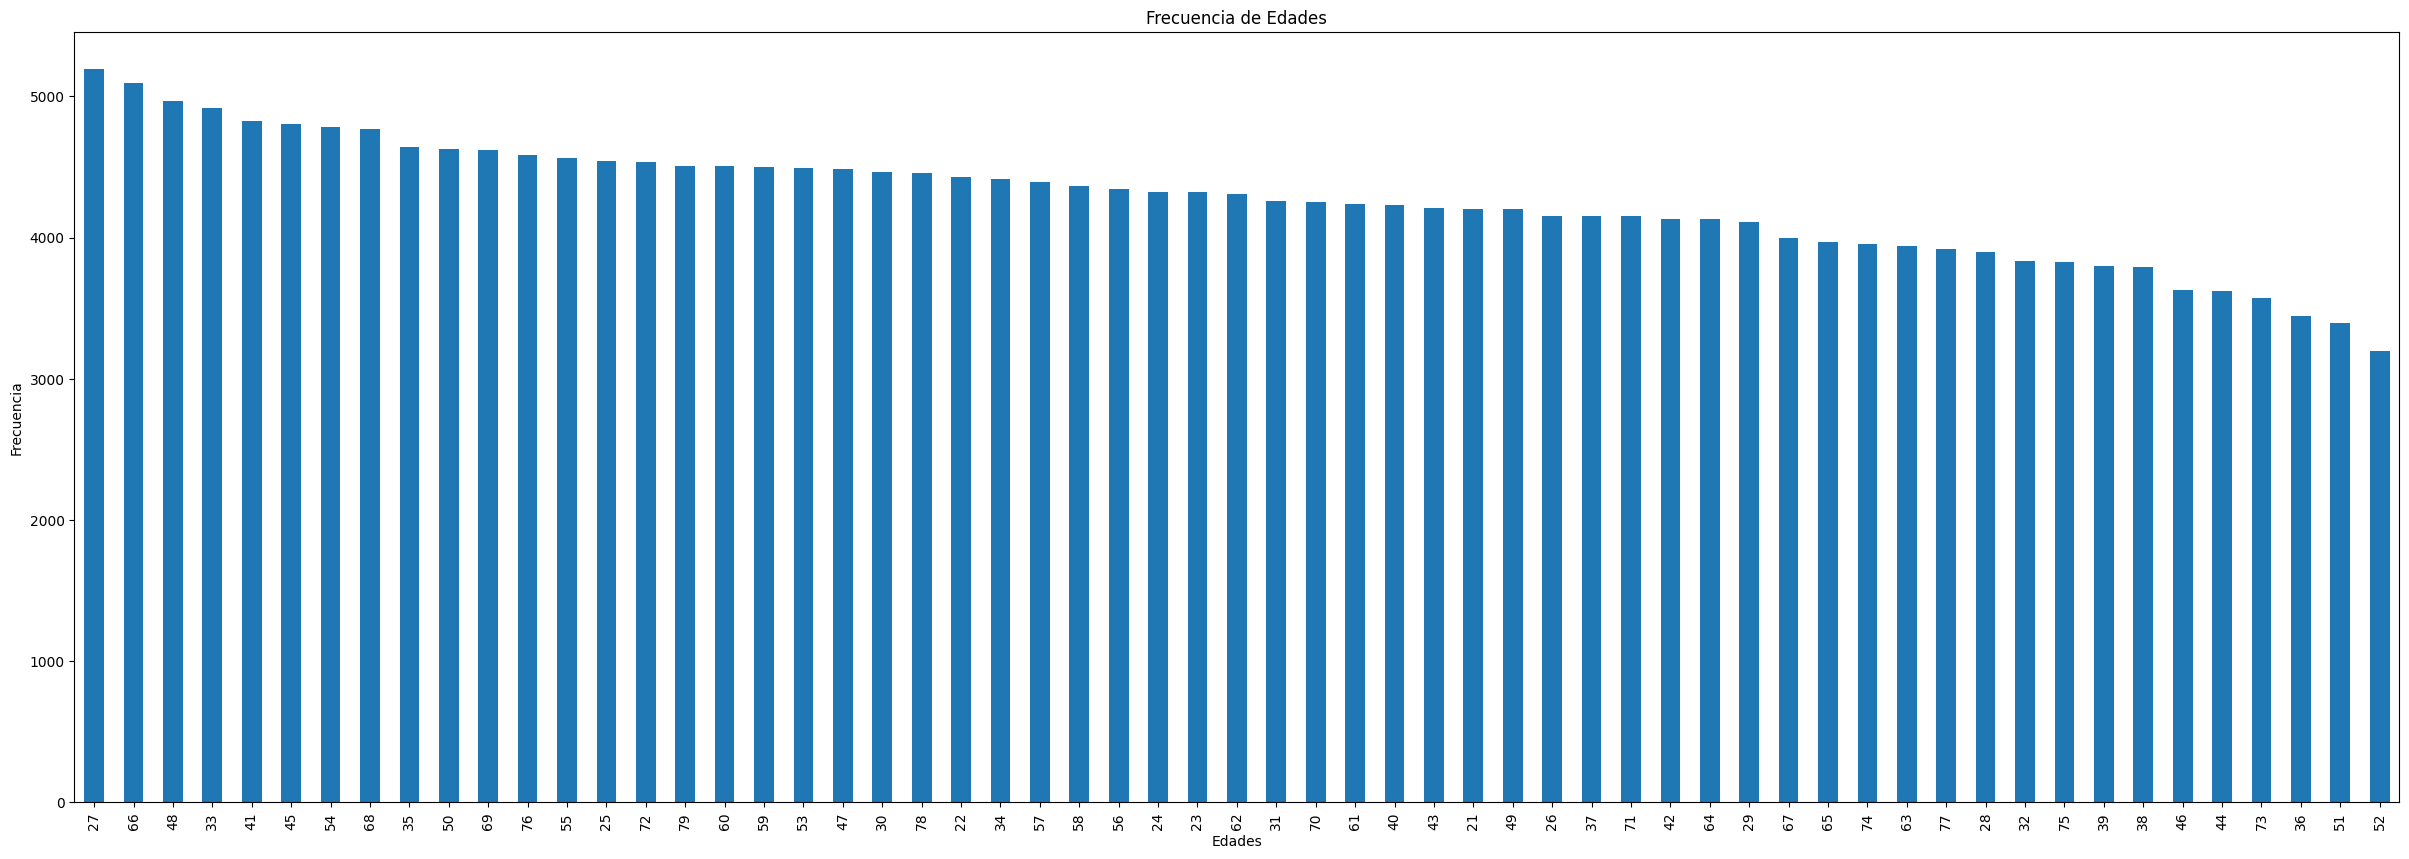

In [ ]:
#Realizamos gráfico de barras del dataframe filtrado (gráfica de barras)
table1_index['frequency'].plot(kind= 'bar', width=0.5, figsize=(30,10))
plt.title('Frecuencia de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

##Columna 2

In [ ]:
#Obtengo un análisis univariado de una variable categórica en especifico
#df[no_automatizadas[1]] = Experience
table2 = freq_tbl(df[no_automatizadas[1]].astype(str))
table2

,Experience,frequency,percentage,cumulative_perc
0,6,13158,0.052214,0.052214
1,9,12936,0.051333,0.103548
2,12,12800,0.050794,0.154341
3,18,12601,0.050004,0.204345
4,10,12503,0.049615,0.253960
5,5,12441,0.049369,0.303329
6,14,12369,0.049083,0.352413
7,19,12287,0.048758,0.401171
8,17,12131,0.048139,0.449310
9,16,12106,0.048040,0.497349


In [ ]:
table2['Experience']=table2['Experience'].astype(int)

In [ ]:
#table2=table2.sort_values(by=['Experience'])

In [ ]:
#Ajusto el indice de mi dataframe
#cambiamos el indice que viene establecido, al que nosotros querramos
table_index2 = table2.set_index('Experience')
table_index2

,frequency,percentage,cumulative_perc
Experience,,,
6,13158,0.052214,0.052214
9,12936,0.051333,0.103548
12,12800,0.050794,0.154341
18,12601,0.050004,0.204345
10,12503,0.049615,0.253960
5,12441,0.049369,0.303329
14,12369,0.049083,0.352413
19,12287,0.048758,0.401171
17,12131,0.048139,0.449310


Text(0, 0.5, 'Frecuencia')

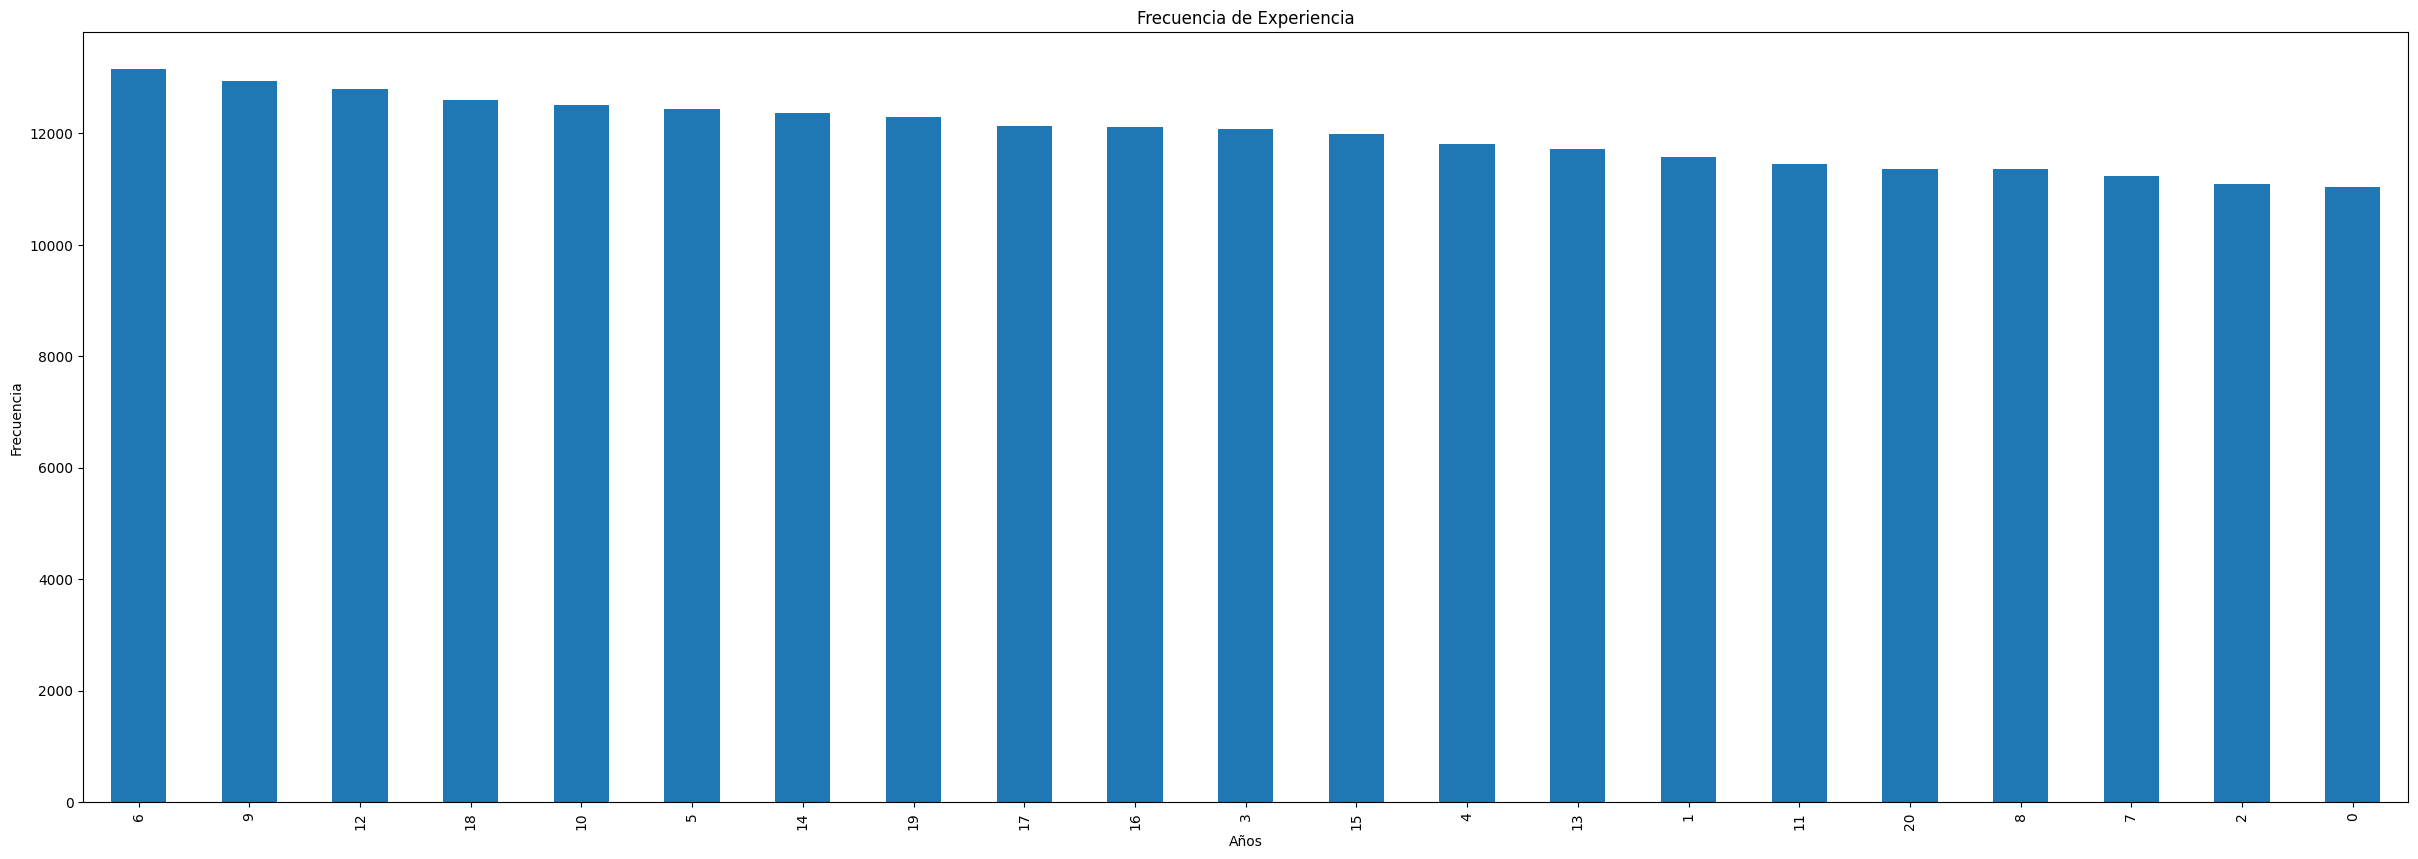

In [ ]:
#Realizamos gráfico de barras del dataframe filtrado (gráfica de barras)
table_index2['frequency'].plot(kind= 'bar', width=0.5, figsize=(30,10))
plt.title('Frecuencia de Experiencia')
plt.xlabel('Años')
plt.ylabel('Frecuencia')

##Columna 3

In [ ]:
#Obtengo un análisis univariado de una variable categórica en especifico
#df[no_automatizadas[2]] = CURRENT_JOB_YRS
table3 = freq_tbl(df[no_automatizadas[2]].astype(str))
table3

,CURRENT_JOB_YRS,frequency,percentage,cumulative_perc
0,3,29460,0.116905,0.116905
1,4,28339,0.112456,0.229361
2,5,25091,0.099567,0.328929
3,6,23491,0.093218,0.422147
4,7,19925,0.079067,0.501214
5,8,18874,0.074897,0.576111
6,9,17132,0.067984,0.644095
7,10,15768,0.062571,0.706667
8,11,13595,0.053948,0.760615
9,1,11575,0.045933,0.806548


In [ ]:
#Ajusto el indice de mi dataframe
#cambiamos el indice que viene establecido, al que nosotros querramos
table3_index = table3.set_index('CURRENT_JOB_YRS')
table3_index

,frequency,percentage,cumulative_perc
CURRENT_JOB_YRS,,,
3,29460,0.116905,0.116905
4,28339,0.112456,0.229361
5,25091,0.099567,0.328929
6,23491,0.093218,0.422147
7,19925,0.079067,0.501214
8,18874,0.074897,0.576111
9,17132,0.067984,0.644095
10,15768,0.062571,0.706667
11,13595,0.053948,0.760615


Text(0, 0.5, 'Frecuencia')

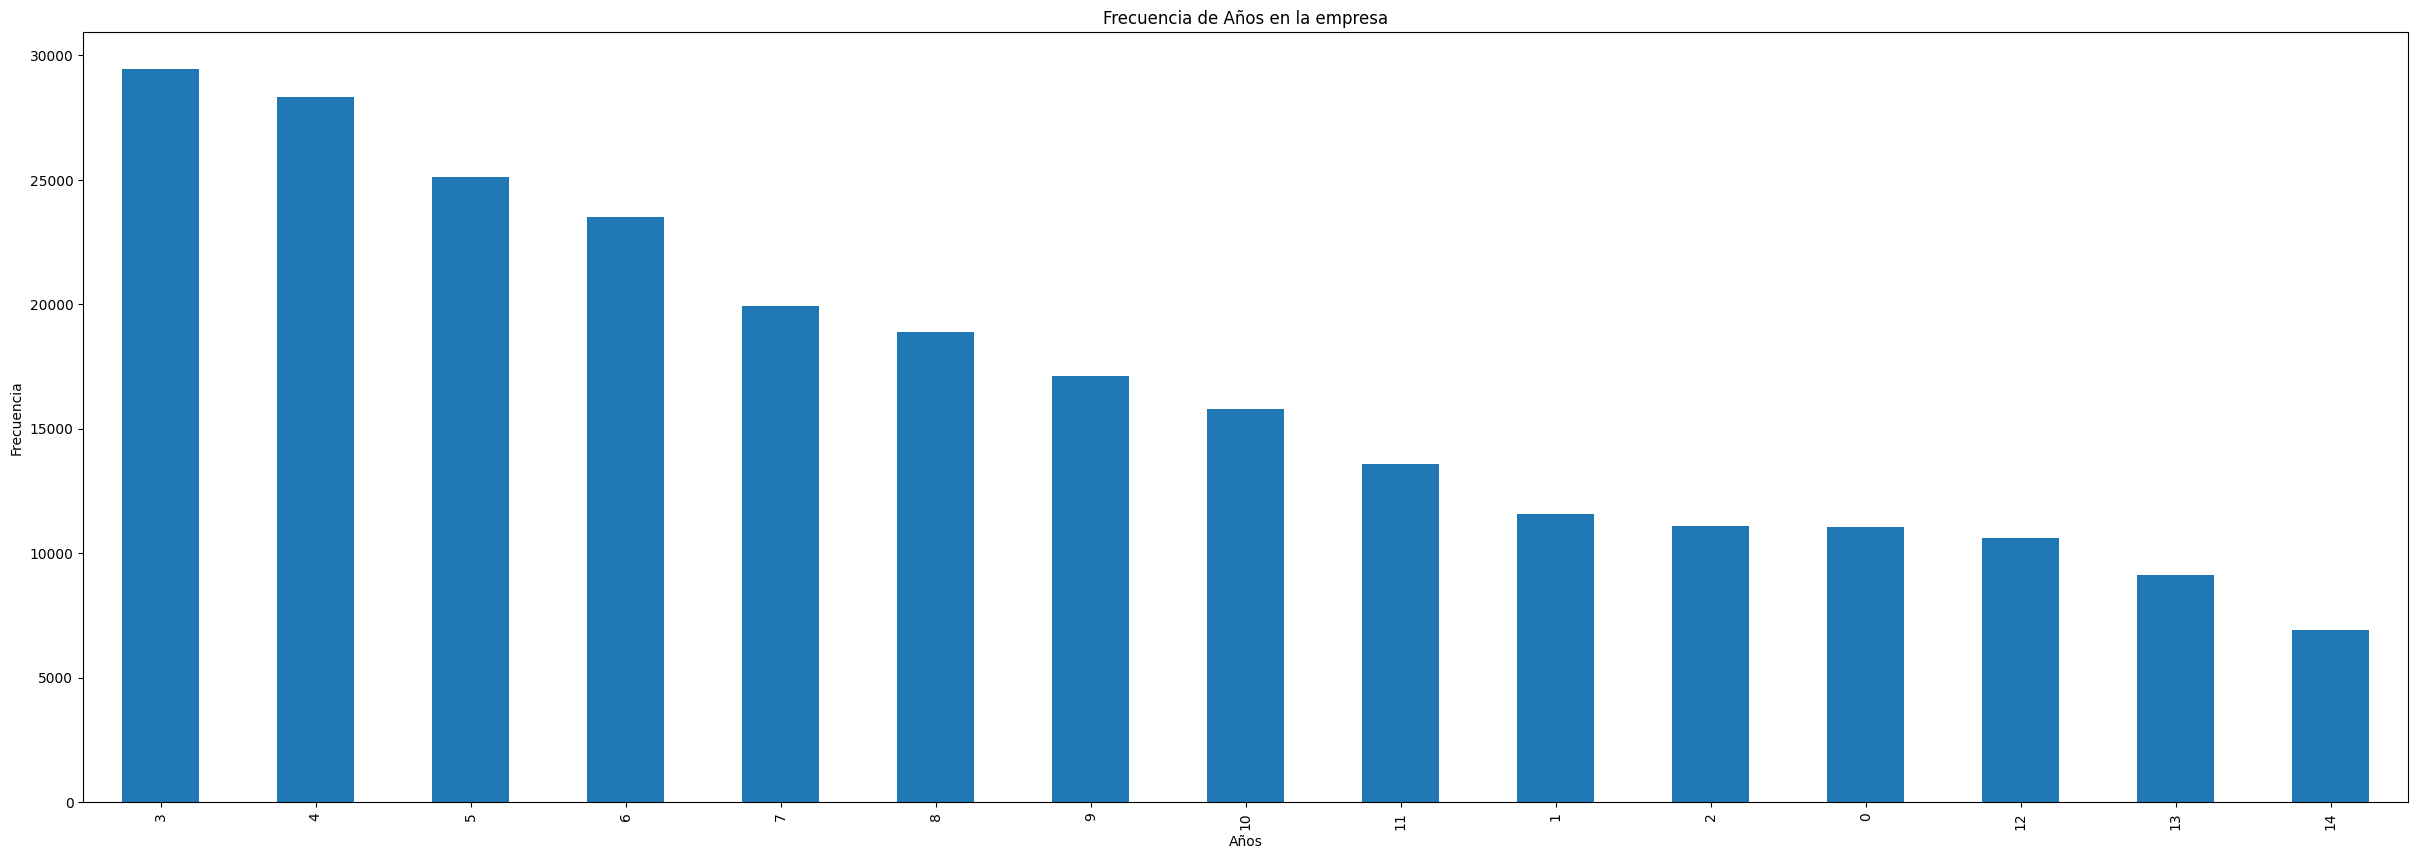

In [ ]:
#Realizamos gráfico de barras del dataframe filtrado (gráfica de barras)
table3_index['frequency'].plot(kind= 'bar', width=0.5, figsize=(30,10))
plt.title('Frecuencia de Años en la empresa')
plt.xlabel('Años')
plt.ylabel('Frecuencia')

#Columna 4

In [ ]:
#Obtengo un análisis univariado de una variable categórica en especifico
#df[no_automatizadas[3]] = CURRENT_HOUSE_YRS
table4 = freq_tbl(df[no_automatizadas[3]].astype(str))
table4

,CURRENT_HOUSE_YRS,frequency,percentage,cumulative_perc
0,11,51873,0.205845,0.205845
1,12,51791,0.205520,0.411365
2,13,50659,0.201028,0.612393
3,14,49003,0.194456,0.806849
4,10,48674,0.193151,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
#cambiamos el indice que viene establecido, al que nosotros querramos
table4_index = table4.set_index('CURRENT_HOUSE_YRS')
table4_index

,frequency,percentage,cumulative_perc
CURRENT_HOUSE_YRS,,,
11,51873,0.205845,0.205845
12,51791,0.205520,0.411365
13,50659,0.201028,0.612393
14,49003,0.194456,0.806849
10,48674,0.193151,1.000000


Text(0, 0.5, 'Frecuencia')

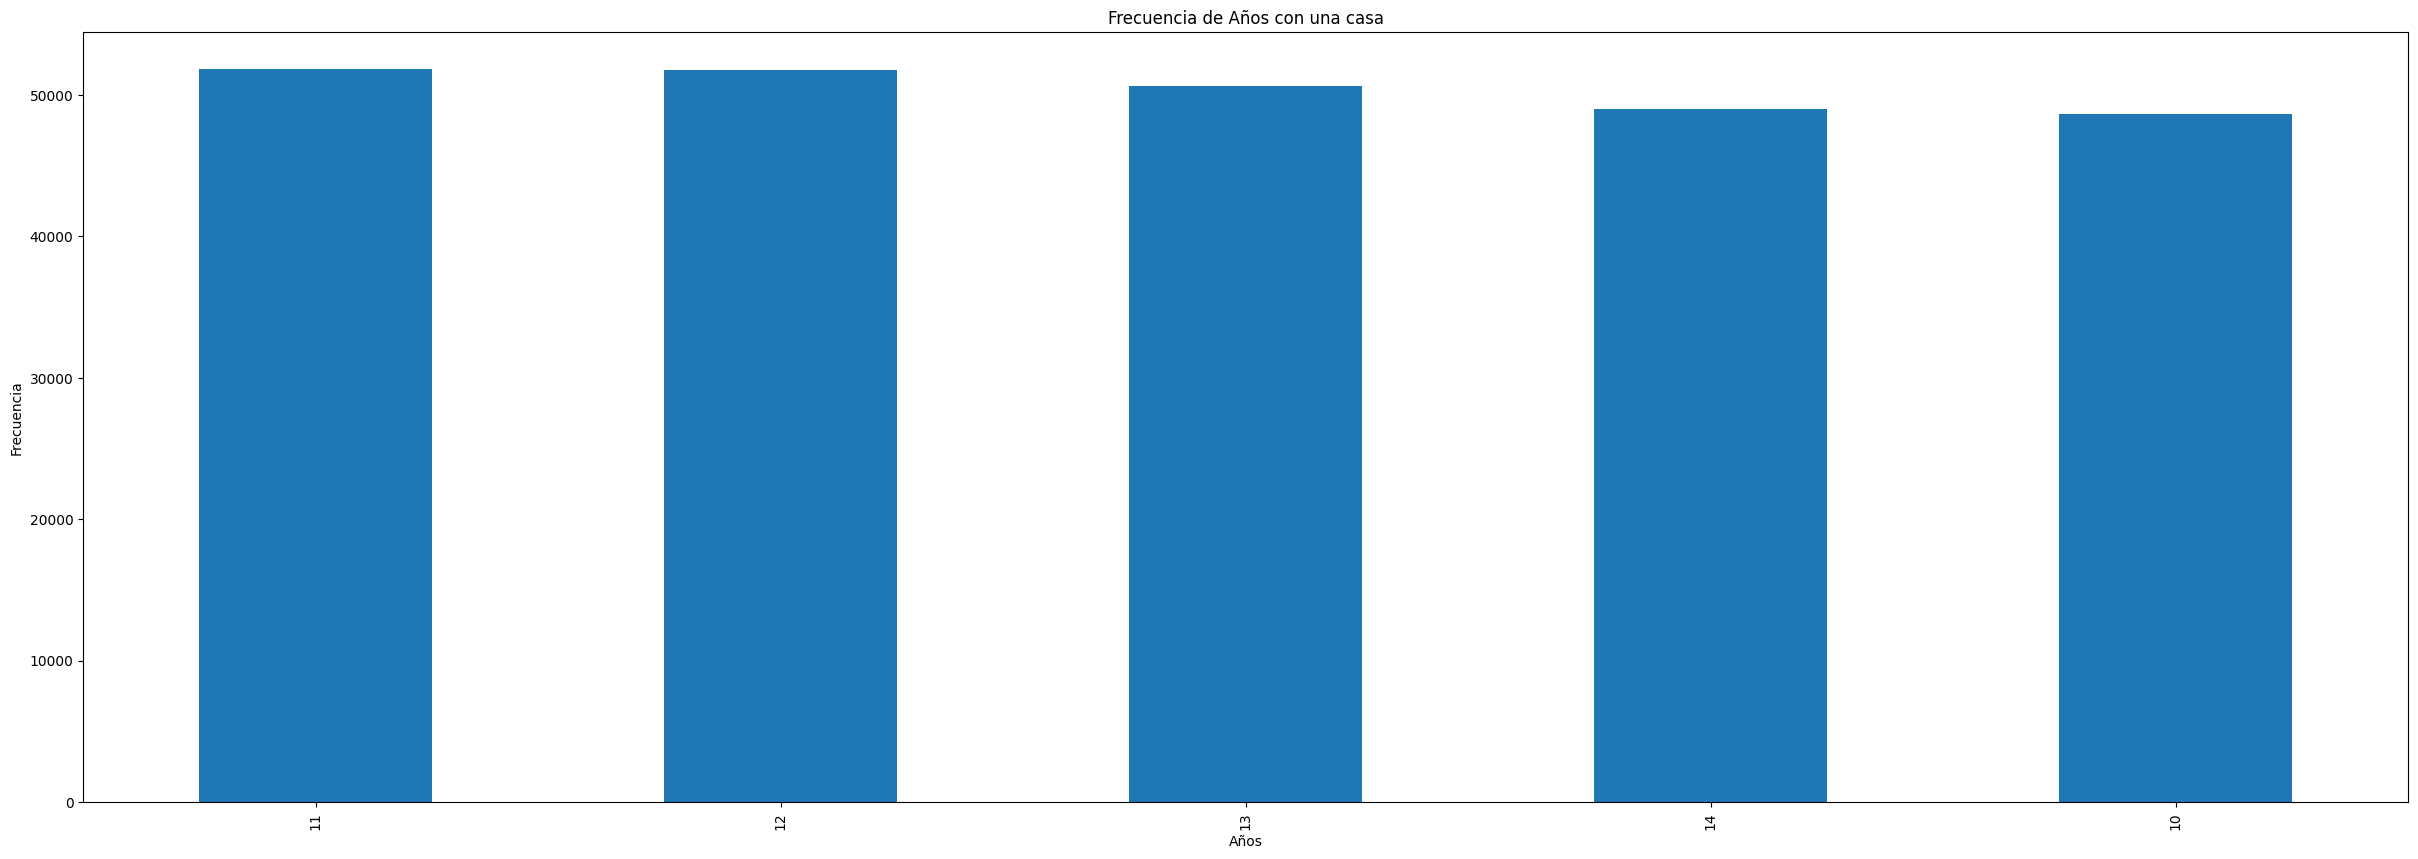

In [ ]:
#Realizamos gráfico de barras del dataframe filtrado (gráfica de barras)
table4_index['frequency'].plot(kind= 'bar', width=0.5, figsize=(30,10))
plt.title('Frecuencia de Años con una casa')
plt.xlabel('Años')
plt.ylabel('Frecuencia')

#Mezclas libres

Mezcla 1: Single vs House Ownership

In [ ]:
#filtro para solo usar la info de los solteros
solo_solteros = df.loc[df['Married/Single'] == 'single']
solo_solteros.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0


In [ ]:
#Obtengo un análisis univariado de una variable categórica en especifico
mezcla1 = freq_tbl(solo_solteros['House_Ownership'])
mezcla1

,House_Ownership,frequency,percentage,cumulative_perc
0,rented,207688,0.917869,0.917869
1,owned,11995,0.053011,0.970880
2,norent_noown,6589,0.029120,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
#cambiamos el indice que viene establecido, al que nosotros querramos
mezcla1_index = mezcla1.set_index('House_Ownership')
mezcla1_index

,frequency,percentage,cumulative_perc
House_Ownership,,,
rented,207688,0.917869,0.917869
owned,11995,0.053011,0.970880
norent_noown,6589,0.029120,1.000000


Text(0.5, 1.0, "Single's House_Ownership")

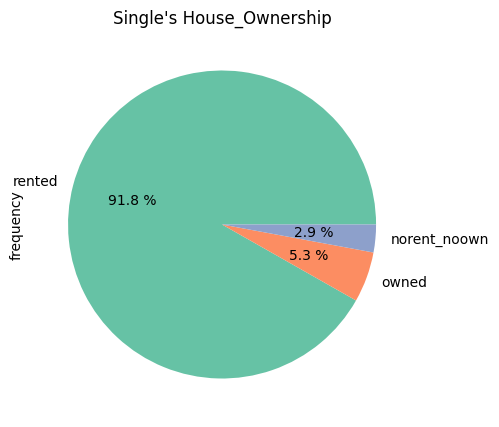

In [ ]:
#Realizamos grafico de área del dataframe filtrado (grafica de pastel)
mezcla1_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%",colors=sns.color_palette('Set2'))
plt.title("Single's House_Ownership")

Mezcla 2: Married vs House Ownership

In [ ]:
#filtro para solo usar la info de los solteros
solo_casados = df.loc[df['Married/Single'] == 'married']
print(solo_casados)

            Id   Income  Age  Experience Married/Single House_Ownership  \
2            3  3991815   66           4        married          rented   
6            7  3954973   58          14        married          rented   
15          16  5694236   39           2        married          rented   
16          17  7315840   71           8        married          rented   
24          25  1065465   23          15        married          rented   
...        ...      ...  ...         ...            ...             ...   
251937  251938  8392122   69          11        married          rented   
251942  251943  8131483   37          11        married          rented   
251943  251944  8525973   31          16        married          rented   
251965  251966  2666519   47          20        married          rented   
251992  251993  7551745   57           7        married          rented   

       Car_Ownership              Profession             CITY  \
2                 no        Techni

In [ ]:
#Obtengo un análisis univariado de una variable categórica en especifico
mezcla2 = freq_tbl(solo_casados['House_Ownership'])
mezcla2

,House_Ownership,frequency,percentage,cumulative_perc
0,rented,24210,0.940998,0.940998
1,owned,923,0.035875,0.976873
2,norent_noown,595,0.023127,1.000000


In [ ]:
#Ajusto el indice de mi dataframe
#cambiamos el indice que viene establecido, al que nosotros querramos
mezcla2_index = mezcla2.set_index('House_Ownership')
mezcla2_index

,frequency,percentage,cumulative_perc
House_Ownership,,,
rented,24210,0.940998,0.940998
owned,923,0.035875,0.976873
norent_noown,595,0.023127,1.000000


Text(0.5, 1.0, "Married's House_Ownership")

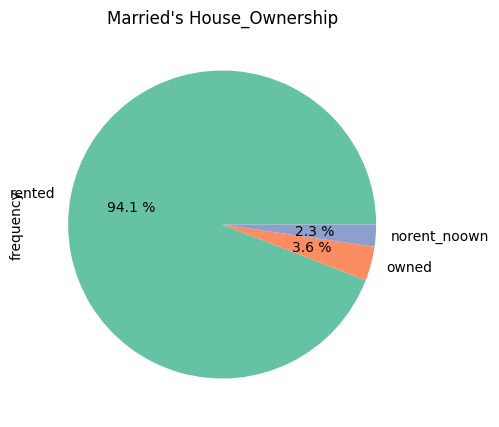

In [ ]:
#Realizamos grafico de área del dataframe filtrado (grafica de pastel)
mezcla2_index['frequency'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%",colors=sns.color_palette('Set2'))
plt.title("Married's House_Ownership")

###Modelos de regresión lineal simple

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB
